<a href="https://colab.research.google.com/github/Mo-Bkny/python/blob/master/UMUZI_Advance_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Helper function to help you load the data

def load_data(data_dir):
    images = []
    labels = []

    # Iterate through each fracture type directory
    for fracture_type in os.listdir(data_dir):
        fracture_dir = os.path.join(data_dir, fracture_type)

        # Check if it's a directory
        if os.path.isdir(fracture_dir):
            # Load training images
            train_dir = os.path.join(fracture_dir, 'Train')
            for img_name in os.listdir(train_dir):
                img_path = os.path.join(train_dir, img_name)
                img = Image.open(img_path).convert('RGB')  # Ensure images are in RGB format
                img = img.resize((224, 224))  # Resize if needed
                images.append(np.array(img))
                labels.append(fracture_type)  # Use the directory name as the label

            # Load testing images
            test_dir = os.path.join(fracture_dir, 'Test')
            for img_name in os.listdir(test_dir):
                img_path = os.path.join(test_dir, img_name)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((224, 224))
                images.append(np.array(img))
                labels.append(fracture_type)

    return np.array(images), np.array(labels)

# Example usage
data_directory = '/content/drive/MyDrive/Bone Break Classification/' # Change appropriately
images, labels = load_data(data_directory)

print(f'Loaded {len(images)} images with {len(set(labels))} unique classes.')

Loaded 1129 images with 10 unique classes.


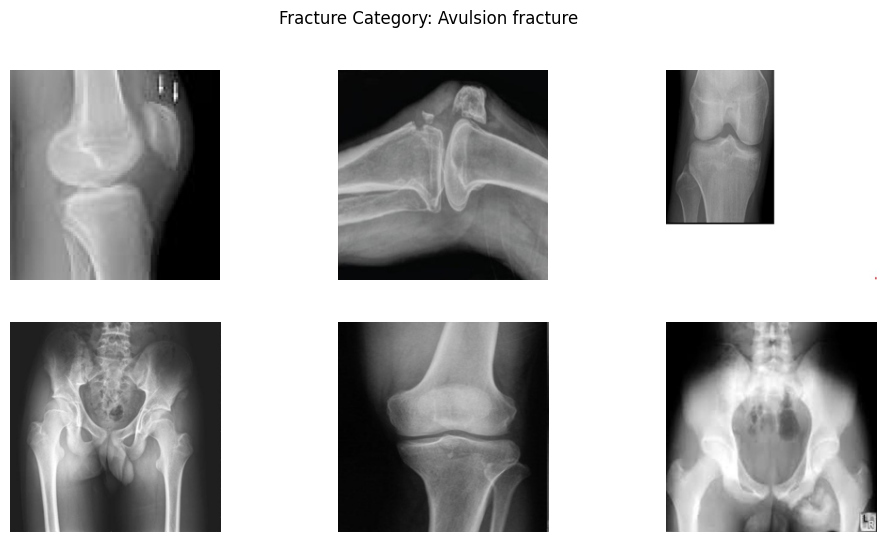

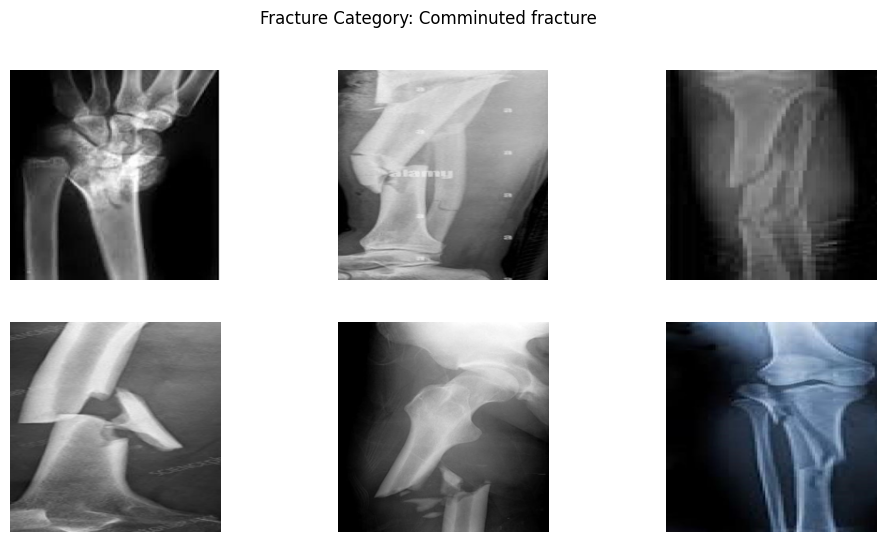

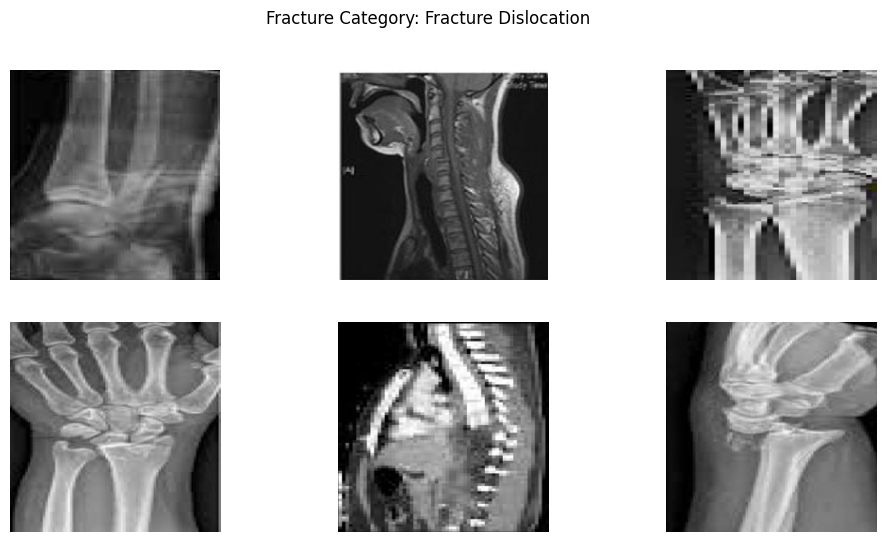

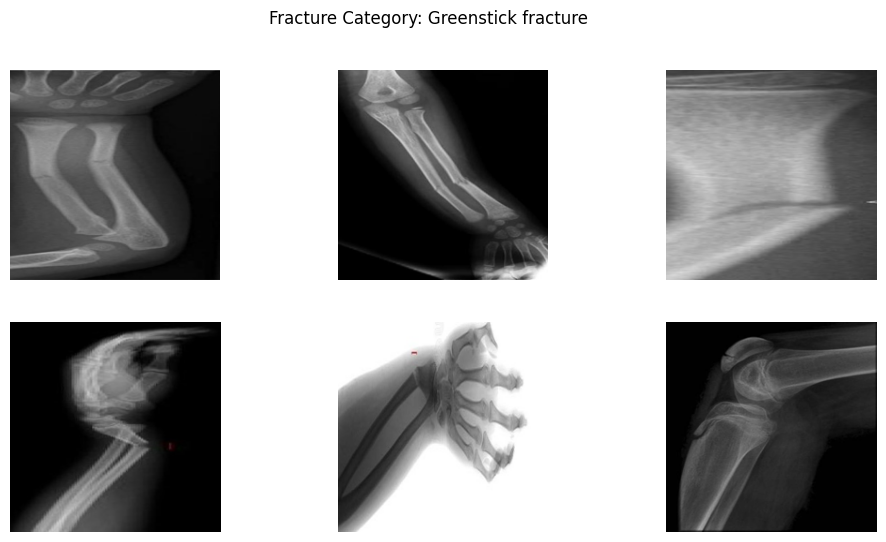

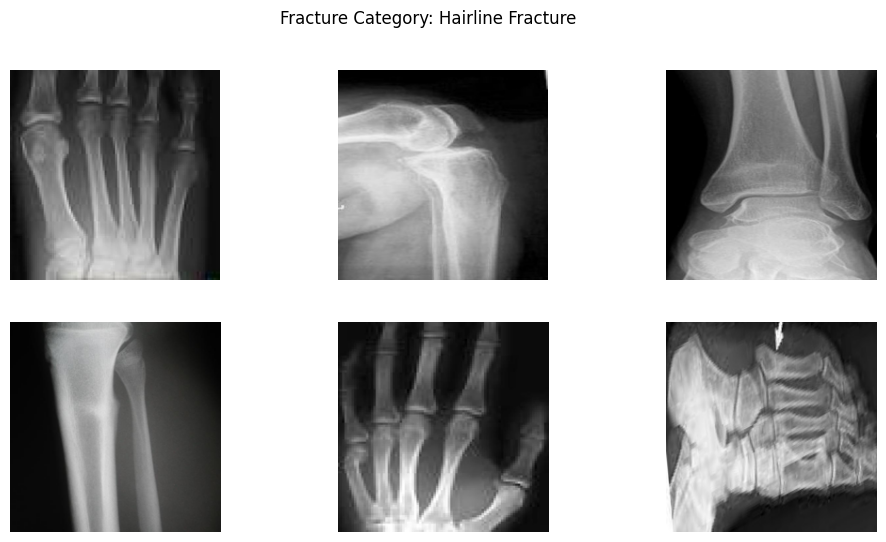

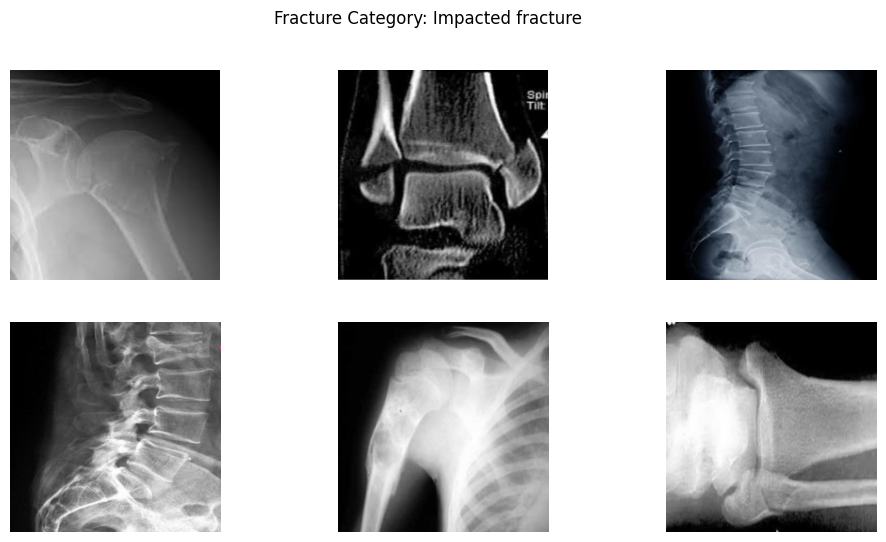

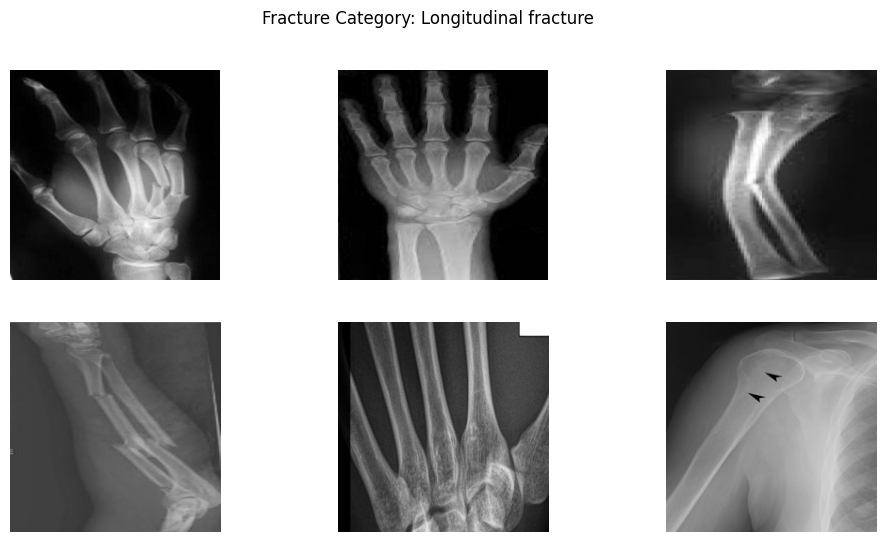

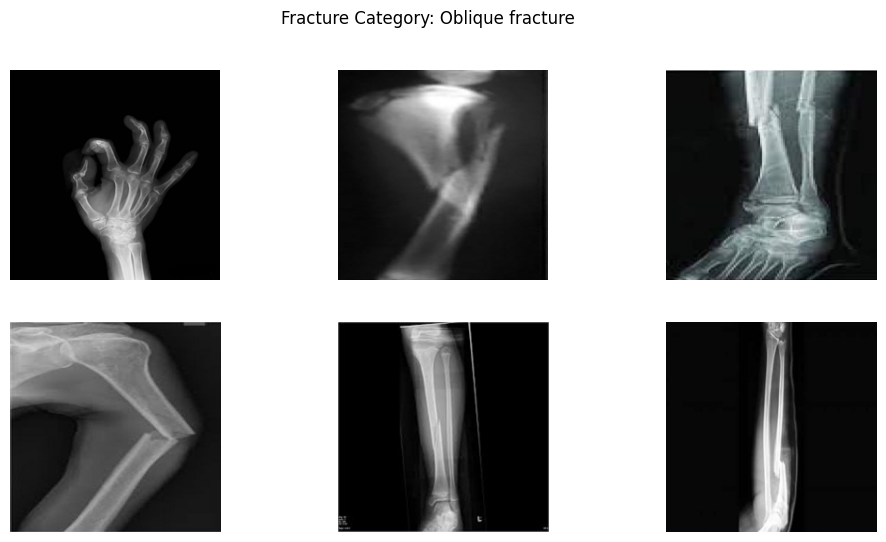

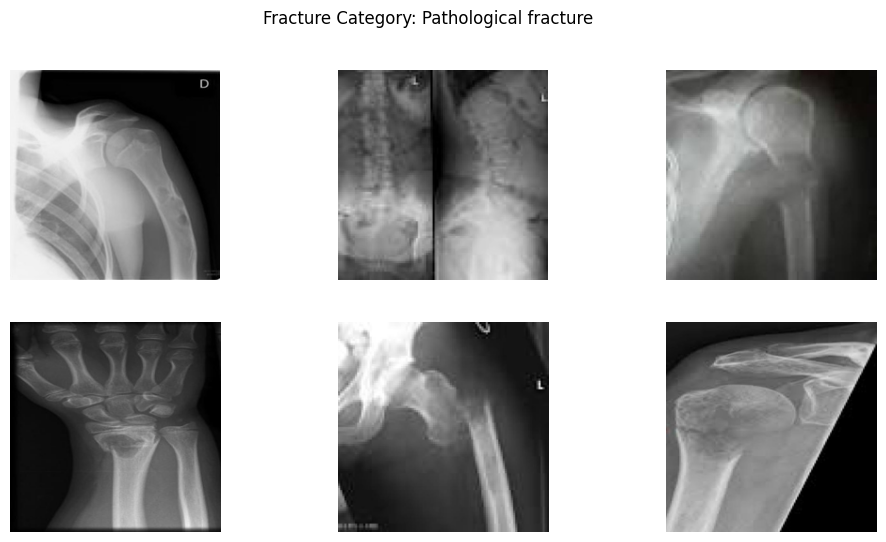

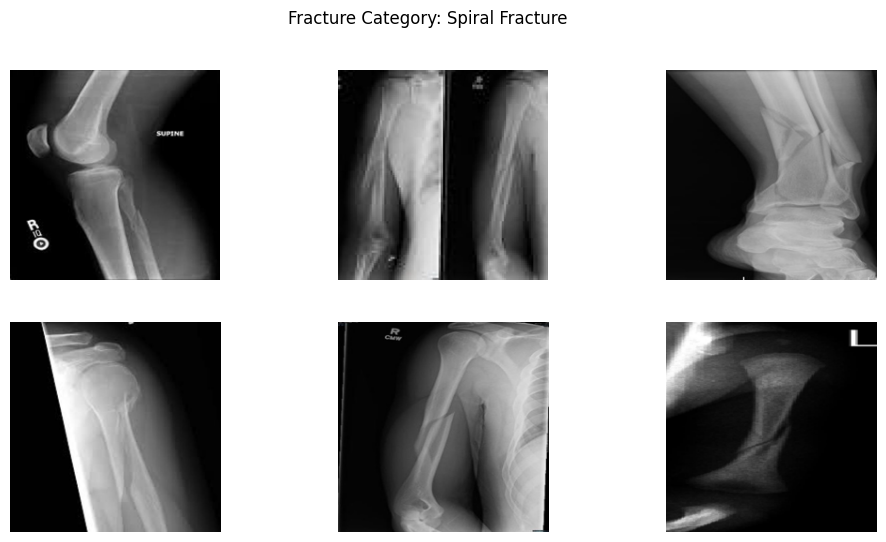

In [4]:
# Visualize a few images from each fracture category
num_categories = len(np.unique(labels))
for i in range(num_categories):
    # Get the indices of images belonging to the current category
    category_indices = np.where(labels == np.unique(labels)[i])[0]
    # Select images for the current category using the indices
    category_images = images[category_indices]

    # Check if there are images for the current category
    if len(category_images) > 0:
        plt.figure(figsize=(12, 6))
        plt.suptitle(f"Fracture Category: {np.unique(labels)[i]}")
        for j in range(min(6, len(category_images))):
            plt.subplot(2, 3, j + 1)
            plt.imshow(category_images[j])
            plt.axis('off')
        plt.show()
    else:
        print(f"No images found for category: {np.unique(labels)[i]}")

In [7]:
# --- Model Training and Evaluation ---
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer

# Preprocessing: One-hot encode labels

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

input_shape = (224, 224, 3)

# Create the model
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax") # Assuming 10 fracture types
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

# 7. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.0988 - loss: 318.9344 - val_accuracy: 0.1504 - val_loss: 2.3316
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.4163 - loss: 1.8752 - val_accuracy: 0.1726 - val_loss: 3.2095
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5960 - loss: 1.4401 - val_accuracy: 0.1858 - val_loss: 4.1539
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.7157 - loss: 0.9878 - val_accuracy: 0.2257 - val_loss: 3.4964
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8357 - loss: 0.6655 - val_accuracy: 0.2566 - val_loss: 4.6666
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8714 - loss: 0.4983 - val_accuracy: 0.2345 - val_loss: 4.8205
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8675 - loss: 0.5484 - val_accuracy: 0.2389 - val_loss: 5.4441
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9006 - loss: 0.4901 - val_accuracy: 0.2257 - val_los

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator
datagen.fit(images)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Determine the number of unique classes
num_classes = len(np.unique(labels)) # This line is added

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Invalid dtype: str672